# Python for Machine Learning
Softbank Robotics Europe

This code is divided in two parts: 
    * one scikit-learn example from the official documentation
    * the workshop to complete
Your work will be evaluated by lauching the whole script. 

Little reminder: it is good to comment your code, but not too much ;) 
    


## Scikit Learn Package Example

Code taken from:
    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


/home/alae/.conda/envs/pfe/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alae/.conda/envs/pfe/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alae/.conda/envs/pfe/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


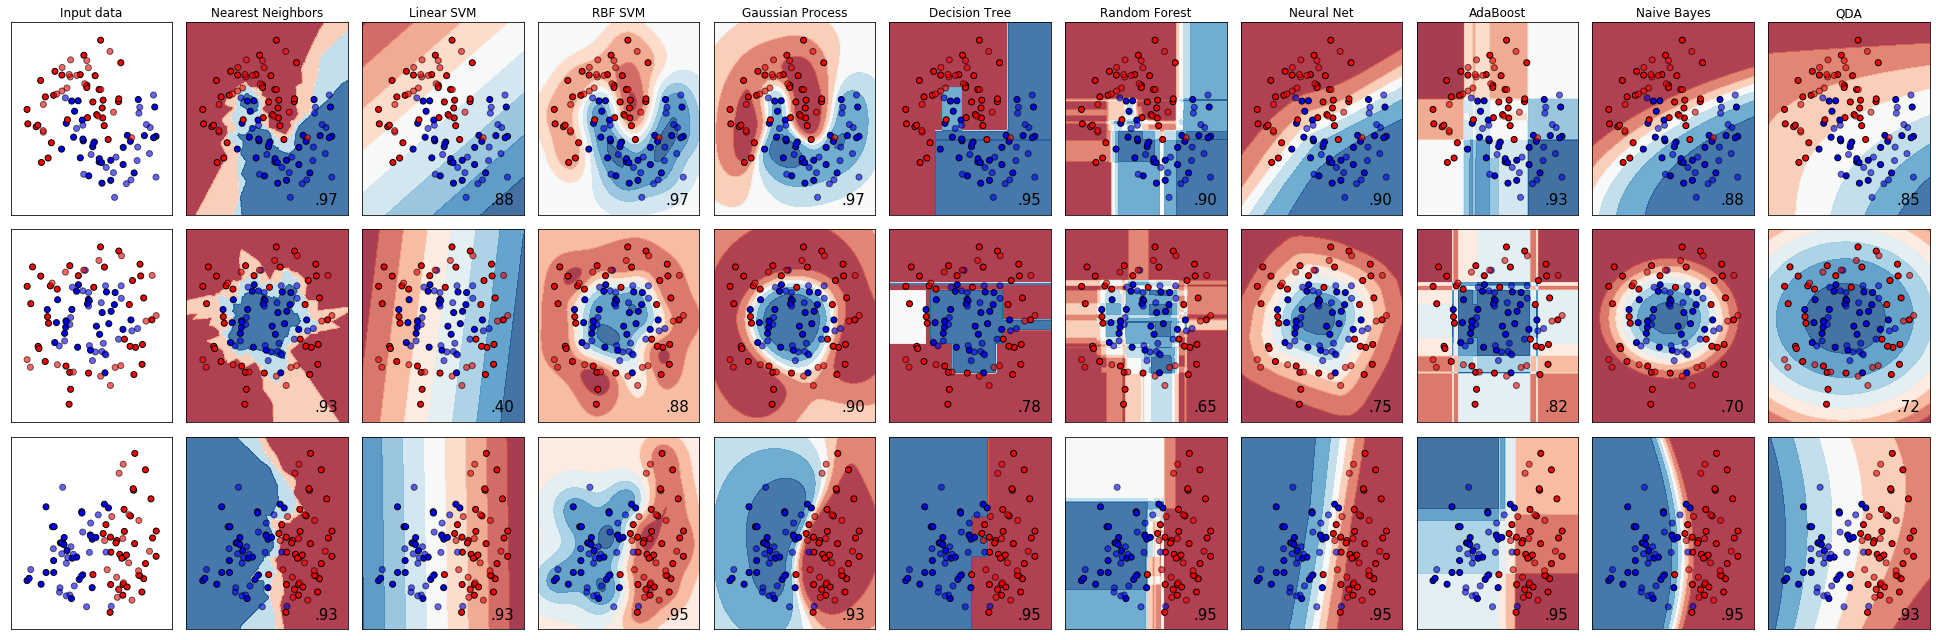

In [1]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Workshop
You will need to "import" the necessary packages to complete your work (in addition to the packages already imported in the example).

### Step 0: import the packages:

In [149]:
# import ...
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import Normalizer

### Step 1.1: import data
You will find the pickle file at the address: [data.pickle](https://gitlab.com/susisanchezr/tp_python_sbre/raw/master/data.pickle). This file contains a python dictionary with the following variables:
* X_train
* Y_train
* X_test
* Y_test

You will train the models on the training dataset and the evaluation on the test dataset...

There is one example per line, where X contains the corresponding vectors of the data and Y the labels.

In [3]:
# open a file, where you stored the pickled data
file = open('data.pickle', 'rb')
# dump information to that file
data = pickle.load(file)
# close the file
file.close()

X_train,Y_train = data['X_train'],data['Y_train']
X_test,Y_test = data['X_test'],data['Y_test']

### Step 1.2: data preprocessing

Data normalisation,by setting for eatch class the mean to 0 and std to 1 

In [189]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X_train_scaled = transformer.fit_transform(X_train)

Use the PCA algorithm from scikit-learn to reduce the X vectors dimension to 3 features.

In [190]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)

### Step 2: data visualization 
You can use the visualization package of your preference (matplotlib, pyplot, ....)

with a bit of color...

In [191]:
df = pd.DataFrame(X_train_pca, columns=['axe 1', 'axe 2', 'axe 3'])
df["class"] = Y_train
#checking that data correctly is normalised"
print(df.describe())

              axe 1         axe 2         axe 3       class
count  6.700000e+02  6.700000e+02  6.700000e+02  670.000000
mean   2.121023e-17  4.242046e-17 -1.855895e-17    1.023881
std    3.058791e+00  1.684494e+00  1.205022e+00    0.821623
min   -6.038000e+00 -3.813967e+00 -3.741336e+00    0.000000
25%   -2.377401e+00 -1.308953e+00 -8.455813e-01    0.000000
50%   -8.736473e-01  1.434279e-01 -1.313349e-03    1.000000
75%    3.027327e+00  1.262206e+00  8.635368e-01    2.000000
max    7.612006e+00  4.443552e+00  4.285108e+00    2.000000


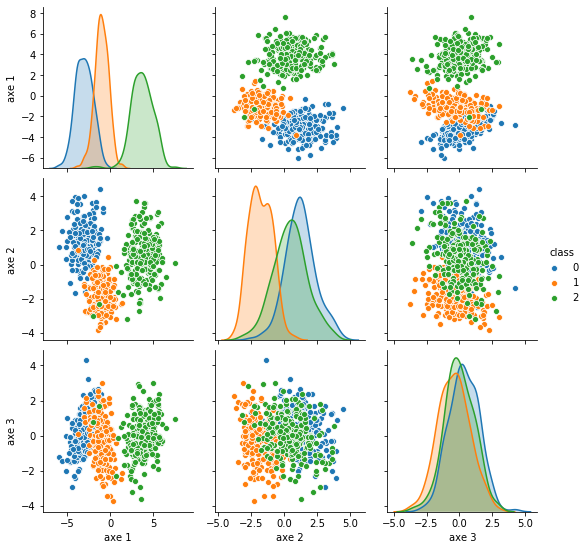

In [192]:
"""
create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row 
and in the x-axis across a single column.The diagonal Axes are treated differently,drawing a plot to show 
the univariate distribution of the data for the variable in that column.
"""
sns.pairplot(df,hue="class")

### Step 3: unsupervised method
Apply **two** clustering methods of your preference (for example k-means and DBSCAN)

#### First clustering methods: Kmean

In [193]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=400, 
                tol=1e-05, random_state=0)
clusters = kmeans.fit_predict(X_train_pca)

Visualize the clusters with the cluster centroids by projecting on the two first axes

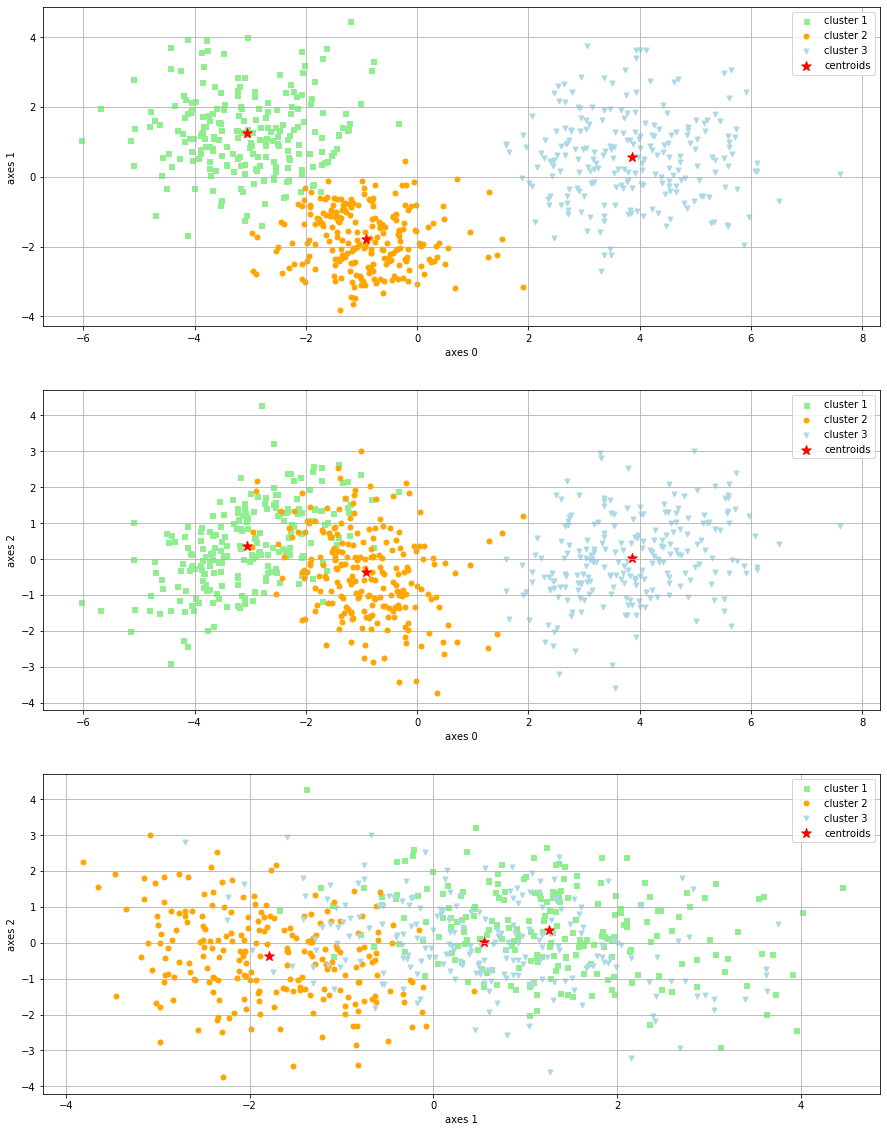

In [194]:
fig, axs = plt.subplots(3,figsize=(15,20))
colors = ['lightgreen','orange','lightblue']
labels = ['cluster 1','cluster 2','cluster 3']
markers = ['s','o','v']
axes = [(0,1),(0,2),(1,2)]
for ax in range(3):
    x = axes[ax][0]
    y = axes[ax][1]
    for i in range(3):
        axs[ax].scatter( X_train_pca[clusters == i, x], 
                        X_train_pca[clusters == i, y],s=25, 
                        c=colors[i], marker=markers[i], label=labels[i] )
    axs[ax].scatter(kmeans.cluster_centers_[:, x], kmeans.cluster_centers_[:, y],
            s=100, marker='*', c='red', label='centroids')
    axs[ax].set(xlabel='axes {}'.format(x), ylabel='axes {}'.format(y))
    axs[ax].legend(scatterpoints=1)
    axs[ax].grid()
plt.show()

#### Second clustering methods: Gaussian Mixture

In [305]:
GMixture = GaussianMixture(n_components=3, covariance_type='full', tol=0.0001, reg_covar=1e-06, max_iter=300)
clusters = GMixture.fit_predict(X_train_pca)

##### Visualizing the clusters by projecting on the two first axes

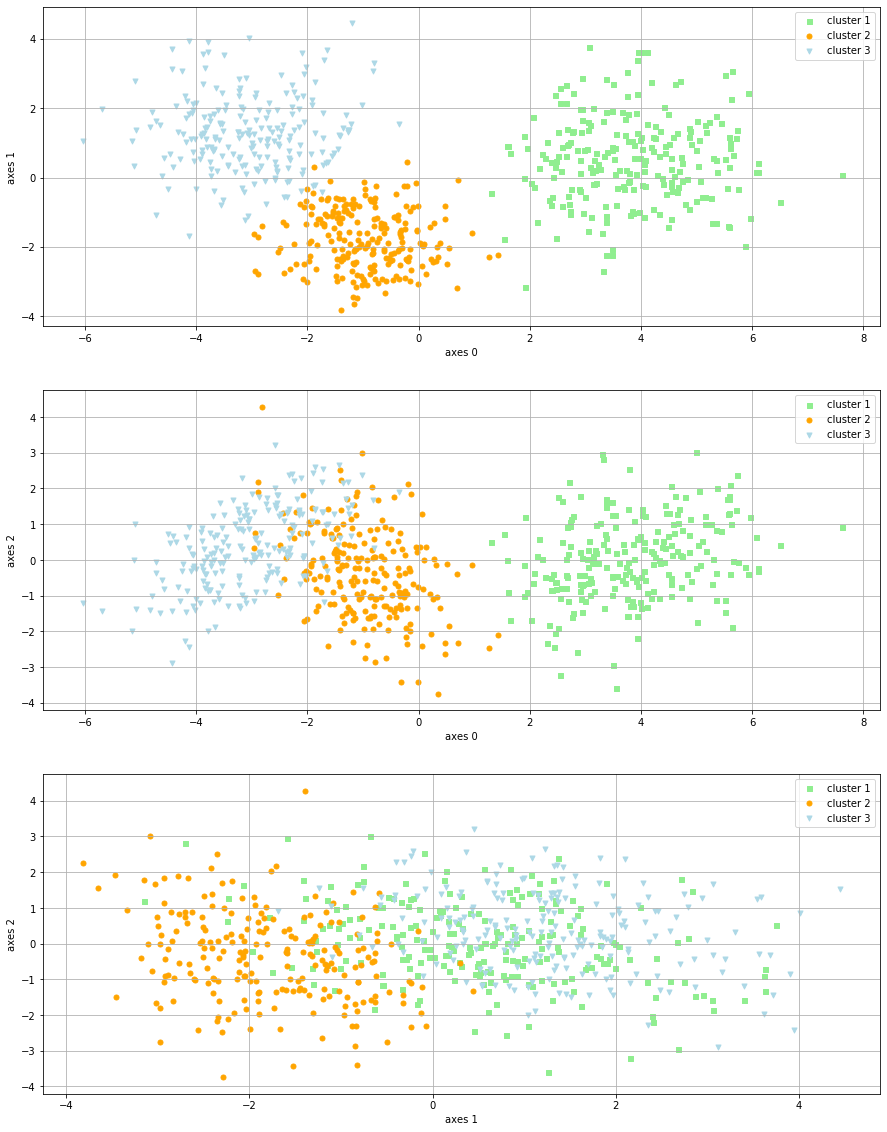

In [196]:
fig, axs = plt.subplots(3,figsize=(15,20))
colors = ['lightgreen','orange','lightblue']
labels = ['cluster 1','cluster 2','cluster 3']
markers = ['s','o','v']
axes = [(0,1),(0,2),(1,2)]
for ax in range(3):
    x = axes[ax][0]
    y = axes[ax][1]
    for i in range(3):
        axs[ax].scatter( X_train_pca[clusters == i, x], 
                        X_train_pca[clusters == i, y],s=25, 
                        c=colors[i], marker=markers[i], label=labels[i] )
    axs[ax].set(xlabel='axes {}'.format(x), ylabel='axes {}'.format(y))
    axs[ax].legend(scatterpoints=1)
    axs[ax].grid()
plt.show()

### Step 4: supervised method
Apply **two** supervised learning methods (one of them using [MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html))

#### Using MLP

In [306]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from sklearn.model_selection import KFold
model = Sequential([
    Input(shape=(3)),
    Dense(16, activation='tanh'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') ])
y = tf.one_hot(Y_train,3)
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['acc'])
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 16)                64        
_________________________________________________________________
dropout_84 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_254 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_85 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_255 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_256 (Dense)            (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
___________________________________________________

In [307]:
model.fit(x=X_train_pca,y=y,epochs=9)

Train on 670 samples
Epoch 1/9
670/670 [==============================] - 1s 759us/sample - loss: 1.0171 - acc: 0.5358
Epoch 2/9
670/670 [==============================] - 0s 69us/sample - loss: 0.7487 - acc: 0.8731
Epoch 3/9
670/670 [==============================] - 0s 82us/sample - loss: 0.4861 - acc: 0.9448
Epoch 4/9
670/670 [==============================] - 0s 88us/sample - loss: 0.2845 - acc: 0.9612
Epoch 5/9
670/670 [==============================] - 0s 77us/sample - loss: 0.1923 - acc: 0.9701
Epoch 6/9
670/670 [==============================] - 0s 93us/sample - loss: 0.1456 - acc: 0.9791
Epoch 7/9
670/670 [==============================] - 0s 74us/sample - loss: 0.1240 - acc: 0.9791
Epoch 8/9
670/670 [==============================] - 0s 80us/sample - loss: 0.1045 - acc: 0.9791
Epoch 9/9
670/670 [==============================] - 0s 96us/sample - loss: 0.1099 - acc: 0.9657


#### Using Support Vector Machine

In [199]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import numpy as np
svm_model = SVC(kernel = 'rbf', gamma='auto').fit(X_train_pca, Y_train)

### Step 5: evaluation
For each of the 4 methods used: evaluate the performance of the model on the test dataset with a metric of your preference.

In [202]:
X_test_scaled = transformer.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
len(X_test),len(Y_test)

(330, 330)

#### Evaluation of the kmean:

In [203]:
ypredicted = kmeans.predict(X_test_pca)
print(classification_report(Y_test,ypredicted))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.94      0.97      0.96       114
           2       0.98      0.97      0.98       101

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



#### Evaluation of the GaussianMixture:

In [204]:
ypredicted = GMixture.predict(X_test_pca)
print(classification_report(Y_test,ypredicted))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02       115
           1       0.96      0.97      0.97       114
           2       0.00      0.00      0.00       101

    accuracy                           0.34       330
   macro avg       0.33      0.33      0.33       330
weighted avg       0.34      0.34      0.34       330



#### Evaluation of the MLP: (the best result)

In [288]:
ypredicted = np.argmax(model.predict(X_test_pca),axis=1)
print(classification_report(Y_test,ypredicted)) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       115
           1       0.96      0.94      0.95       114
           2       0.98      0.98      0.98       101

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



#### Evaluation of the SVM:

In [205]:
ypredicted = svm_model.predict(X_val_pca)
print(classification_report(Y_test,ypredicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       115
           1       0.96      0.97      0.97       114
           2       0.98      0.98      0.98       101

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



### Step 6: open question 
By analyzing the characteristics of your PCA model, indicate how many dimensions are necessary to represent 75% of the training information. 

In [304]:
# Computing the coovariance matrix
cov = X_train_scaled.T @ X_train_scaled
# diagonalising the coovariance matrix
val , vect = np.linalg.eigh(cov)
# Computing how many dimensions are necessary to represent 75% of the training information.
numbersOfComponent= 0
Eigenused = 0
for i in range(len(val)):
    Eigenused += val[29 - i]
    numbersOfComponent += 1
    information = Eigenused/np.sum(val)
    if information > 0.75:
        print('we need to take the first {} components'.format(numbersOfComponent))
        break
    else:
        print('by taking {} components we have only {} of the training information'.format(numbersOfComponent,information))
    


by taking 1 components we have only 0.3114079756221665 of the training information
by taking 2 components we have only 0.40585125384381493 of the training information
by taking 3 components we have only 0.45461148598179285 of the training information
by taking 4 components we have only 0.496709663747308 of the training information
by taking 5 components we have only 0.5360532719777443 of the training information
by taking 6 components we have only 0.5746810382305825 of the training information
by taking 7 components we have only 0.6114347124776445 of the training information
by taking 8 components we have only 0.6468683701185515 of the training information
by taking 9 components we have only 0.6821679040105848 of the training information
by taking 10 components we have only 0.7169946260164657 of the training information
we need to take the first 11 components


### Step 7: optional question
Propose a code using the flask package that serves a web page displaying your name and a link that points at [http://scikit-learn.org](http://scikit-learn.org) and opens a figure of your preference.

### Step 8: submission
Send your python script or your notebook at: [marine.chamoux@softbankrobotics.com](mailto:marine.chamoux@softbankrobotics.com)